In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/Self Data Science learning/ML/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.select_dtypes(exclude=object).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
dtype: int64

here we see that there are 173638 null values in product_category_2 and 383247 null values in product_category_2

# Let's visualize it

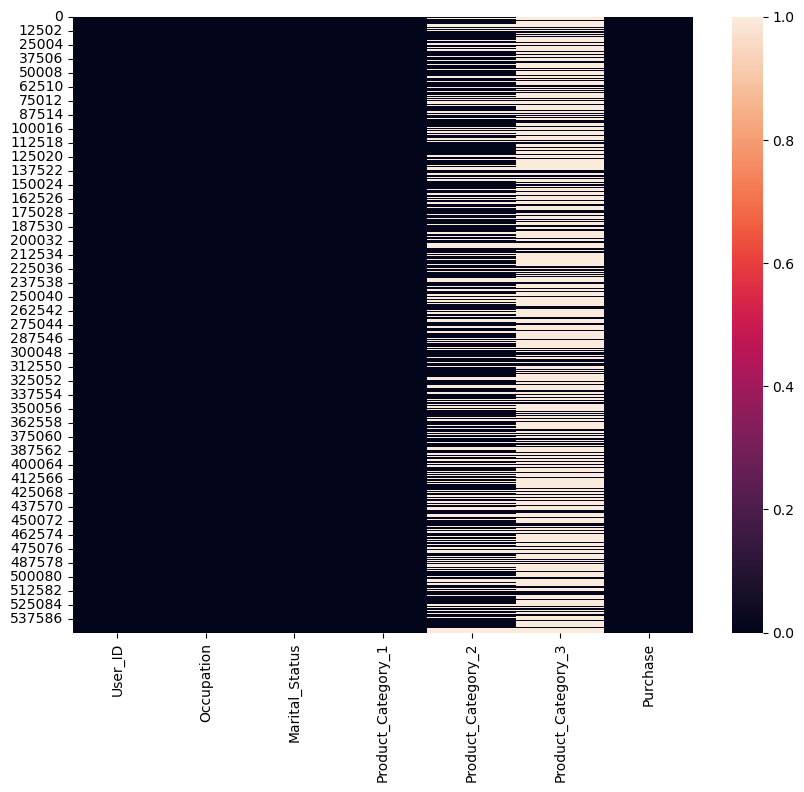

In [5]:
#creating a heat map to visualize the null values
plt.figure(figsize=(10,8))
sns.heatmap(data=df.select_dtypes(exclude=object).isnull()) 
plt.show()

In [8]:
! pip install missingno

<Axes: >

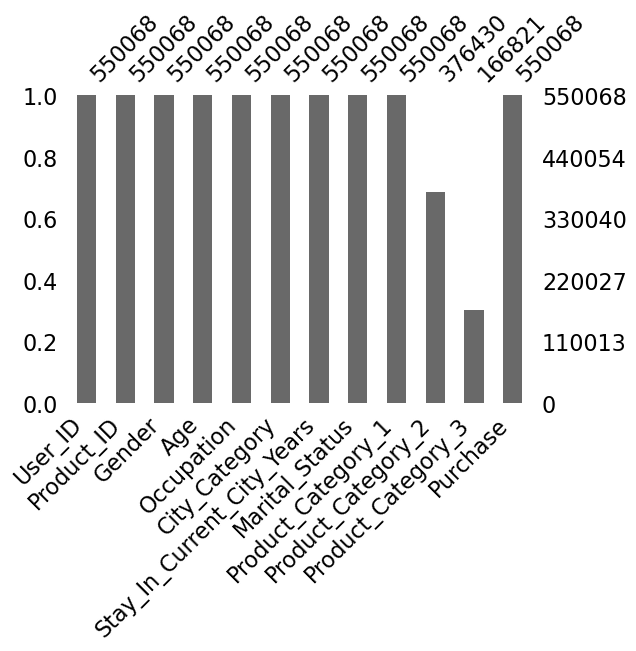

In [11]:
# Reference : https://github.com/ResidentMario/missingno
# Importing the libraries 
import missingno as msno 
msno.bar(df,figsize=(6,4)) 

<Axes: >

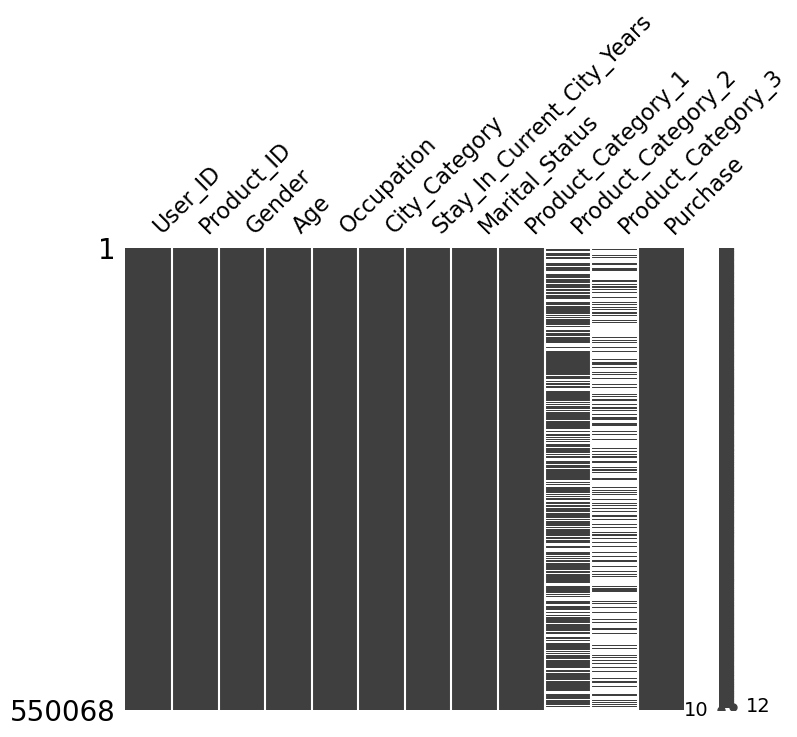

In [13]:
# Visualize missing values as a matrix 
msno.matrix(df,figsize=(8,6)) 

# Using simpleImputer

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
#we perform simple Imputer, so we do not change categorical to numerical, for now we just drop it

In [18]:
df=df.drop(['User_ID','Product_ID','Gender','Age','City_Category'],axis=1)

In [19]:
df.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,2,0,3,NaN,NaN,8370
1,10,2,0,1,6.0,14.0,15200
2,10,2,0,12,NaN,NaN,1422
3,10,2,0,12,14.0,NaN,1057
4,16,4+,0,8,NaN,NaN,7969


In [29]:
#split the data
x=df.drop(['Purchase'],axis=1)   #independent data
y=df['Purchase']                #dependent daata

In [31]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
len(X_train), len(y_train)   #check the length of train data

(440054, 440054)

In [33]:
len(X_test), len(y_test)     #check the length of test data

(110014, 110014)

In [38]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [39]:
trf= ColumnTransformer([
    ('imputer1',imputer1,['Product_Category_2']),
     ('imputer2',imputer2,['Product_Category_3']) 
], remainder='passthrough')

In [40]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(),
                                 ['Product_Category_2']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Product_Category_3'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_

array([9.84053686])

In [43]:
trf.named_transformers_['imputer2'].statistics_

array([14.])

In [44]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [48]:
new=pd.DataFrame(X_train)
new.head()

,0,1,2,3,4,5
0,15.0,14.0,7,3,1,1
1,9.840537,14.0,12,4+,0,5
2,14.0,17.0,5,1,0,8
3,9.840537,14.0,4,2,0,8
4,8.0,14.0,4,1,0,1


In [55]:
new.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [53]:
new1=pd.DataFrame(X_test)
new1.head()

,0,1,2,3,4,5
0,2.0,16.0,19,3,0,1
1,15.0,16.0,11,1,0,1
2,15.0,14.0,0,2,1,8
3,15.0,16.0,4,3,0,1
4,8.0,16.0,4,0,0,6


In [56]:
new1.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64